# **Definição do Problema**

* Desenvolver um modelo de machine learning capaz de classificar se um empréstimo deve ser aprovado ou não com base em características do cliente. Isso pode incluir atributos como renda, histórico de crédito, idade, entre outros.




---




# **Objetivos:**

- Coletar e pré-processar dados de clientes que solicitaram empréstimos.

- Treinar diferentes modelos de classificação para prever a aprovação de empréstimos.

- Avaliar o desempenho dos modelos e selecionar o mais adequado para a implementação.

**Relevância:**
* A capacidade de prever a aprovação de empréstimos com precisão pode ajudar as instituições financeiras a minimizar riscos, melhorar a satisfação do cliente e otimizar o processo de tomada de decisão.

# **Coleta e pré-processamento de dados:**
 Descrever as fontes de dados, os métodos de coleta e as técnicas de pré-processamento utilizadas para
preparar os dados para a análise, incluindo limpeza, tratamento de valores
ausentes e normalização

# **Fontes de Dados:**
* Os dados foram obtidos de um arquivo CSV contendo informações sobre os clientes e seus pedidos de empréstimo.
* Os dados foram coletados de um sistema de gerenciamento de empréstimos, contendo informações como renda, idade, histórico de crédito, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Importando as bibliotecas
# Carregando os dados
df = pd.read_csv('/content/clientes.csv', na_values='na')
print("Primeiras linhas dos dados carregados:")
print(df.head(n=5))

# Descrição da fonte de dados
print("Descrição da Fonte de Dados: Os dados foram obtidos de um sistema de aprovação de empréstimos. Eles incluem informações sobre a aprovação de empréstimos para clientes com base em vários critérios financeiros e pessoais.")


Primeiras linhas dos dados carregados:
  cod_cliente  sexo estado_civil dependentes      educacao empregado  renda  \
0    LP001002  Male           No           0      Graduate        No   5849   
1    LP001003  Male          Yes           1      Graduate        No   4583   
2    LP001005  Male          Yes           0      Graduate       Yes   3000   
3    LP001006  Male          Yes           0  Not Graduate        No   2583   
4    LP001008  Male           No           0      Graduate        No   6000   

  renda_conjuge  emprestimo  prestacao_mensal  historico_credito imovel  \
0             0         NaN             360.0                1.0  Urban   
1          1508       128.0             360.0                1.0  Rural   
2             0        66.0             360.0                1.0  Urban   
3          2358       120.0             360.0                1.0  Urban   
4             0       141.0             360.0                1.0  Urban   

  aprovacao_emprestimo  
0         

In [ ]:
# Análise exploratória inicial
print("Estrutura dos dados:", df.shape)
print("Clientes com empréstimo aprovado:", df[df['aprovacao_emprestimo'] == 'Y'].shape)
print("Clientes com empréstimo reprovado:", df[df['aprovacao_emprestimo'] == 'N'].shape)


Estrutura dos dados: (614, 13)
Clientes com empréstimo aprovado: (422, 13)
Clientes com empréstimo reprovado: (192, 13)


In [ ]:
# Proporções de aprovação e reprovação
qtd_total, _ = df.shape
qtd_aprovados, _ = df[df['aprovacao_emprestimo'] == 'Y'].shape
qtd_reprovados, _ = df[df['aprovacao_emprestimo'] == 'N'].shape
print(f"Proporção de clientes com empréstimo aprovado: {round(100 * qtd_aprovados / qtd_total, 2)}%")
print(f"Proporção de clientes com empréstimo reprovado: {round(100 * qtd_reprovados / qtd_total, 2)}%")


Proporção de clientes com empréstimo aprovado: 68.73%
Proporção de clientes com empréstimo reprovado: 31.27%


In [ ]:
# Verificação e tratamento de dados faltantes
print("Verificação de dados faltantes no dataset:")
print(df.isna().any())
def stats_dados_faltantes(df):
    stats = []
    for col in df.columns:
        if df[col].isna().any():
            qtd = df[col].isna().sum()
            total = len(df)
            stats.append({col: {'quantidade': qtd, 'porcentagem': round(100 * qtd / total, 2)}})
    return stats
print("Dados faltantes antes da limpeza:")
print(stats_dados_faltantes(df))

Verificação de dados faltantes no dataset:
cod_cliente             False
sexo                     True
estado_civil             True
dependentes              True
educacao                False
empregado                True
renda                   False
renda_conjuge           False
emprestimo               True
prestacao_mensal         True
historico_credito        True
imovel                  False
aprovacao_emprestimo    False
dtype: bool
Dados faltantes antes da limpeza:
[{'sexo': {'quantidade': 13, 'porcentagem': 2.12}}, {'estado_civil': {'quantidade': 3, 'porcentagem': 0.49}}, {'dependentes': {'quantidade': 15, 'porcentagem': 2.44}}, {'empregado': {'quantidade': 32, 'porcentagem': 5.21}}, {'emprestimo': {'quantidade': 22, 'porcentagem': 3.58}}, {'prestacao_mensal': {'quantidade': 14, 'porcentagem': 2.28}}, {'historico_credito': {'quantidade': 50, 'porcentagem': 8.14}}]


In [ ]:
# Remover as linhas com dados faltantes
df.dropna(inplace=True)

In [ ]:
# Salvar o dataframe limpo em um novo arquivo CSV
df.to_csv('clientes_limpo.csv', index=False)

# **Seleção de dados :**
A seleção de atributos foi baseada na disponibilidade de dados e na relevância percebida para a previsão de aprovação de empréstimos. Atributos categóricos como educação e emprego foram escolhidos devido à sua influência potencial na estabilidade financeira do cliente.

# **Transformação de dados :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           480 non-null    object 
 1   sexo                  480 non-null    object 
 2   estado_civil          480 non-null    object 
 3   dependentes           480 non-null    object 
 4   educacao              480 non-null    object 
 5   empregado             480 non-null    object 
 6   renda                 480 non-null    int64  
 7   renda_conjuge         480 non-null    object 
 8   emprestimo            480 non-null    float64
 9   prestacao_mensal      480 non-null    float64
 10  historico_credito     480 non-null    float64
 11  imovel                480 non-null    object 
 12  aprovacao_emprestimo  480 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 52.5+ KB


In [ ]:
# Remover colunas desnecessárias
df = df.drop(columns=['cod_cliente'])

# Corrigir a formatação das colunas numéricas
numerical_features = ['renda', 'renda_conjuge', 'emprestimo', 'prestacao_mensal', 'historico_credito']
for feature in numerical_features:
    if df[feature].dtype == 'object':
        # Remover pontos de milhares e converter para float
        df[feature] = df[feature].str.replace('.', '').astype(float)
    else:
        # Converter diretamente para float se não estiver no formato correto
        df[feature] = df[feature].astype(float)

# Separar as características (features) e o alvo (target)
X = df.drop('aprovacao_emprestimo', axis=1)
y = df['aprovacao_emprestimo']

# Identificar colunas numéricas e categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Definir transformações para colunas numéricas e categóricas
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Aplicar as transformações
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Verificar dimensões das colunas
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Reconstituir o DataFrame transformado
df_transformed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Adicionar a coluna alvo ao DataFrame transformado
df_transformed['aprovacao_emprestimo'] = y.values

# Salvar o DataFrame transformado em um arquivo CSV
df_transformed.to_csv('clientes_transformado.csv', index=False)

print("Dados transformados e salvos em clientes_transformado.csv")

Dados transformados e salvos em clientes_transformado.csv


In [ ]:
# Visualizando o dataframe transformado
df_transformed.head()

,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,sexo_Female,sexo_Male,estado_civil_No,estado_civil_Yes,dependentes_0,...,dependentes_2,dependentes_3+,educacao_Graduate,educacao_Not Graduate,empregado_No,empregado_Yes,imovel_Rural,imovel_Semiurban,imovel_Urban,aprovacao_emprestimo
0,-0.137970,-0.052483,-0.208089,0.275542,0.413197,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,N
1,-0.417536,-0.052487,-0.979001,0.275542,0.413197,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y
2,-0.491180,-0.052482,-0.307562,0.275542,0.413197,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Y
3,0.112280,-0.052487,-0.046446,0.275542,0.413197,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
4,0.009319,-0.052478,1.520245,0.275542,0.413197,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y


# **Mineração de dados :**

**Algoritmos Utilizados:**

* Random Forest Classifier

* Logistic Regression

* K-Nearest Neighbors

In [ ]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Classifier:
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           N       0.88      0.50      0.64        28
           Y       0.82      0.97      0.89        68

    accuracy                           0.83        96
   macro avg       0.85      0.74      0.76        96
weighted avg       0.84      0.83      0.82        96

Confusion Matrix:
 [[14 14]
 [ 2 66]]


In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8229166666666666
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.39      0.56        28
           Y       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Confusion Matrix:
 [[11 17]
 [ 0 68]]


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           N       0.81      0.46      0.59        28
           Y       0.81      0.96      0.88        68

    accuracy                           0.81        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.81      0.79        96

Confusion Matrix:
 [[13 15]
 [ 3 65]]


## Visualização de dados com gráficos



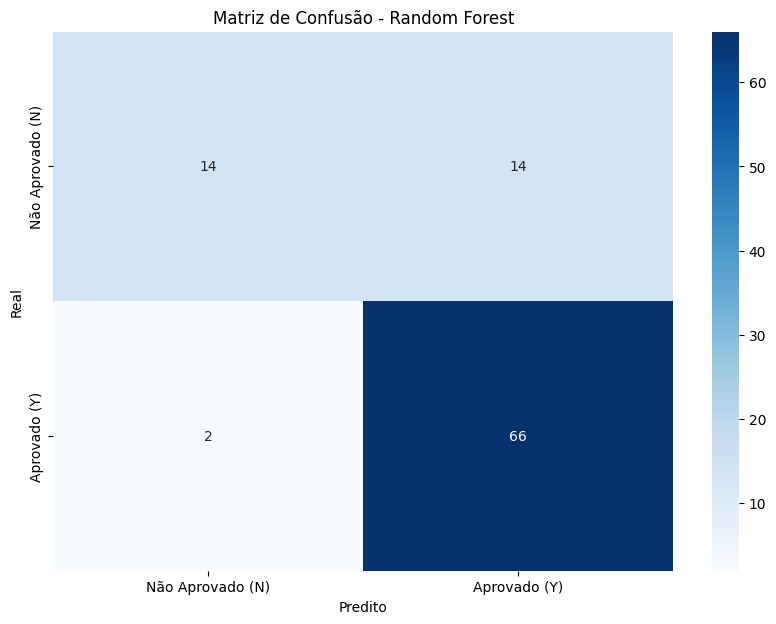

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supondo que y_test e y_pred_rf sejam os dados reais e as previsões do modelo Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Definir os rótulos
labels = ['Não Aprovado (N)', 'Aprovado (Y)']

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


# **Explicação do gráfico**
- As células da matriz mostram o número de previsões feitas para cada combinação de valores reais e preditos.

- Os valores na diagonal (de TN a TP) indicam as previsões corretas.

- Os valores fora da diagonal indicam os erros de classificação:
 - FN (célula inferior esquerda): Casos reais de aprovação que foram previstos como não aprovados.
 - FP (célula superior direita): Casos reais de não aprovação que foram previstos como aprovados.